<a href="https://www.kaggle.com/code/pumpkin18/salary-prediction-using-linear-regression?scriptVersionId=123145389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#C85C8E;overflow:hidden;font-weight:500">Salary Prediction 📈📈 Using Simple Linear Regression</div>





# **Table of Contents**

1.	[Introduction](#1)
2.	[EDA](#2)
3.	[Model Training](#3)
4.	[Evaluation](#4)



<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries
    </h3>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Reading Data
    </h3>
</div>

In [2]:
#Reading Dataset
dataset=pd.read_csv('/kaggle/input/salary/Salary.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
#Number of Rows and Cols In Dataset
dataset.shape #35 Rows and 2 Columns

(35, 2)

In [4]:
#Checking Info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
dataset.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Checking For Null Values
    </h3>
</div>

In [6]:
#Checking for Null Values
dataset.isnull().sum() #no null values

YearsExperience    0
Salary             0
dtype: int64

<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Exploratory Data Analysis
    </h1>
</div>

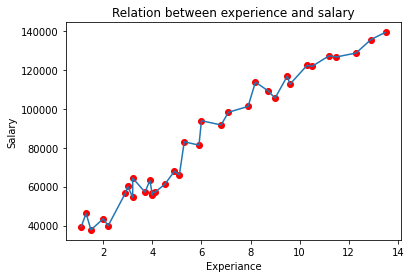

In [7]:
#Separating Dependent and Independent Attributes
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
plt.scatter(x,y,color='red')
plt.plot(x,y)
plt.xlabel("Experiance")  # add X-axis label
plt.ylabel("Salary")  # add Y-axis label
plt.title("Relation between experience and salary")
plt.show()

<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Training
    </h1>
</div>

In [8]:
#Splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("No. of Rows in Train {}".format(X_train.shape))
print("NO. of Rows in Test {}".format(X_test.shape))

No. of Rows in Train (28, 1)
NO. of Rows in Test (7, 1)


In [9]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Prediction and Evaluation
    </h1>
</div>

In [10]:
#Predicting the y values of test dataset
y_pred=model.predict(X_test)
y_pred

array([120057.87672477,  88127.64484315,  73456.99776241, 118331.91824468,
        97620.41648363,  71731.03928232,  63101.24688189])

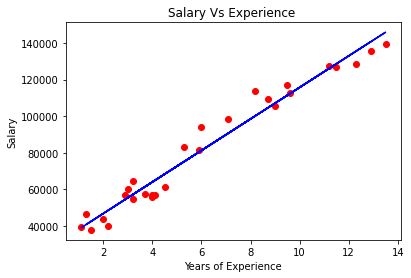

In [11]:
#Plotting Graph for training data
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.title("Salary Vs Experience ")
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [12]:
#R2_score
print("R2_Score: {}".format(r2_score(y_test,y_pred)))

#Mean Absolute Error(MAE)
print("\nMean Absolute Error(MAE) :",mean_absolute_error(y_test,y_pred))

#Mean Squared Error(MSE)
print("\nMean Squared Error(MSE):",mean_squared_error(y_test,y_pred))

R2_Score: 0.9708090245443415

Mean Absolute Error(MAE) : 3500.419123800644

Mean Squared Error(MSE): 16561691.220974546


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>